## Proyecto Final
Elaborado por: Zaira Valentina Avila Lazcano


1. Realizar las siguientes actividades usando la matriz de coactivación adjunta del conectoma del cerebro humano
     - Realizar en Jupyter Notebook donde realices de forma clara y ordenado cada una de las actividades.
     - Entregar archivos el notebook y exportar a un archivo pdf.

## 1
- Definir grafos con la matriz estableciendo umbrales de coactivación de 0.8, 0.9 y 1
y graficar cada grafo. Añadir las coordenadas tridimensionales (incluidas en el archivo
.mat).



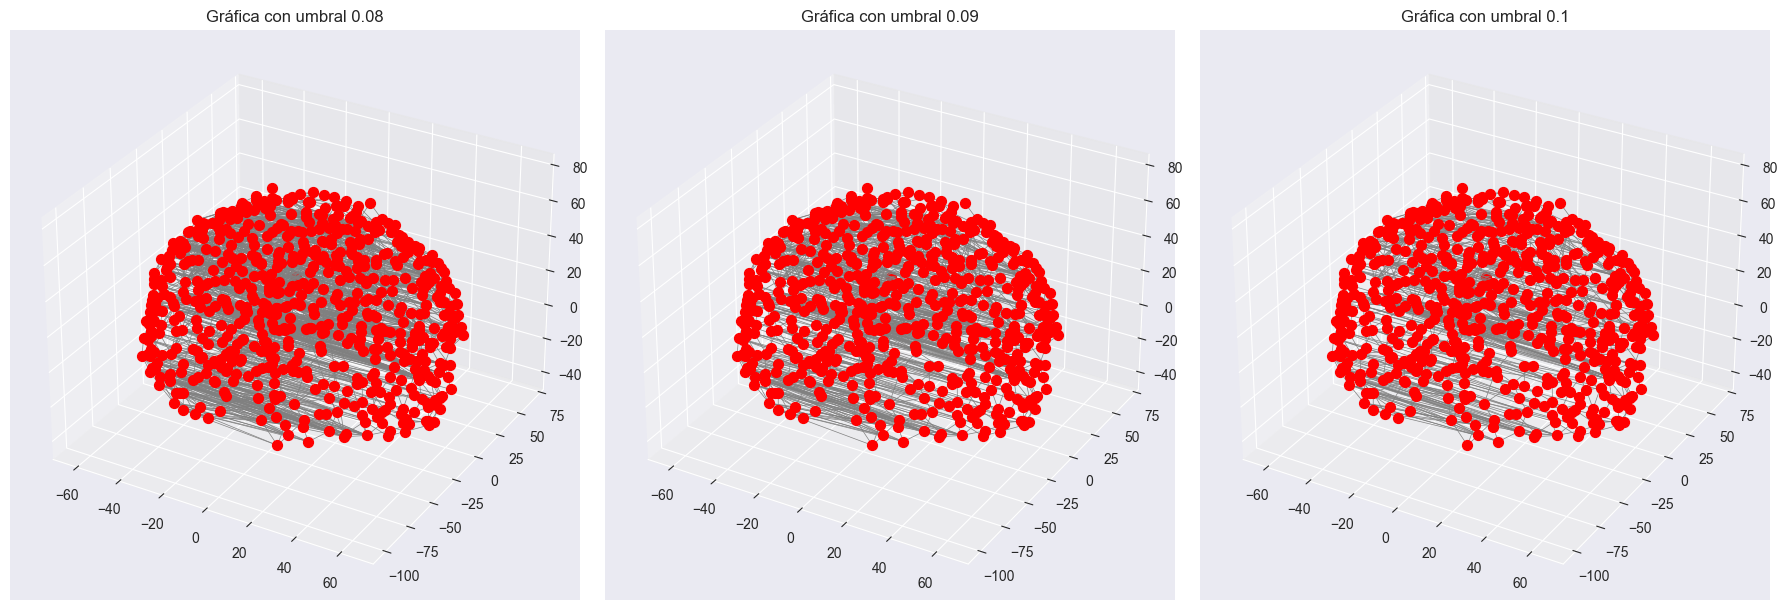

In [256]:
import scipy.io
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

data = scipy.io.loadmat('/Users/ZvalEnes/Desktop/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/Coactivation_matrix.mat')
coactivation_matrix = data['Coactivation_matrix']
coordinates = data['Coord']

def create_graph(matrix, threshold):
    binary_matrix = (matrix >= threshold).astype(int)
    graph = nx.from_numpy_array(binary_matrix)
    return graph

thresholds = [0.08, 0.09, 0.1]
graphs = [create_graph(coactivation_matrix, t) for t in thresholds]

fig = plt.figure(figsize=(18, 6))
for i, (graph, threshold) in enumerate(zip(graphs, thresholds)):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.set_title(f'Gráfica con umbral {threshold}', fontsize=12)
    pos = {node: coordinates[node] for node in graph.nodes()}
    
    for edge in graph.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color='gray', linewidth=0.5)  

    for node in graph.nodes():
        ax.scatter(pos[node][0], pos[node][1], pos[node][2], color='red', s=50)   

plt.tight_layout()
plt.show()


## 2
- Con uno de los grafos en el punto uno con umbral 0.9, generar una animación
donde se haga girar 360° el grafo del cerebro para visualizar las conexiones
establecido


Grafo con umbral 0.09, tiene coordenadas de conexiones:

Conexion: x: [np.float64(7.243636363636369), np.float64(7.986531986531986)], y: [np.float64(37.01090909090908), np.float64(46.22222222222223)], z: [np.float64(9.425454545454542), np.float64(15.609427609427613)]
Conexion: x: [np.float64(7.243636363636369), np.float64(7.55725190839695)], y: [np.float64(37.01090909090908), np.float64(33.8320610687023)], z: [np.float64(9.425454545454542), np.float64(23.511450381679396)]
Conexion: x: [np.float64(7.243636363636369), np.float64(8.902439024390247)], y: [np.float64(37.01090909090908), np.float64(36.1869918699187)], z: [np.float64(9.425454545454542), np.float64(-0.31707317073170316)]
Conexion: x: [np.float64(7.243636363636369), np.float64(9.39776951672863)], y: [np.float64(37.01090909090908), np.float64(52.98141263940519)], z: [np.float64(9.425454545454542), np.float64(3.1524163568773247)]
Conexion: x: [np.float64(7.243636363636369), np.float64(-3.418604651162795)], y: [np.float64(37.01090

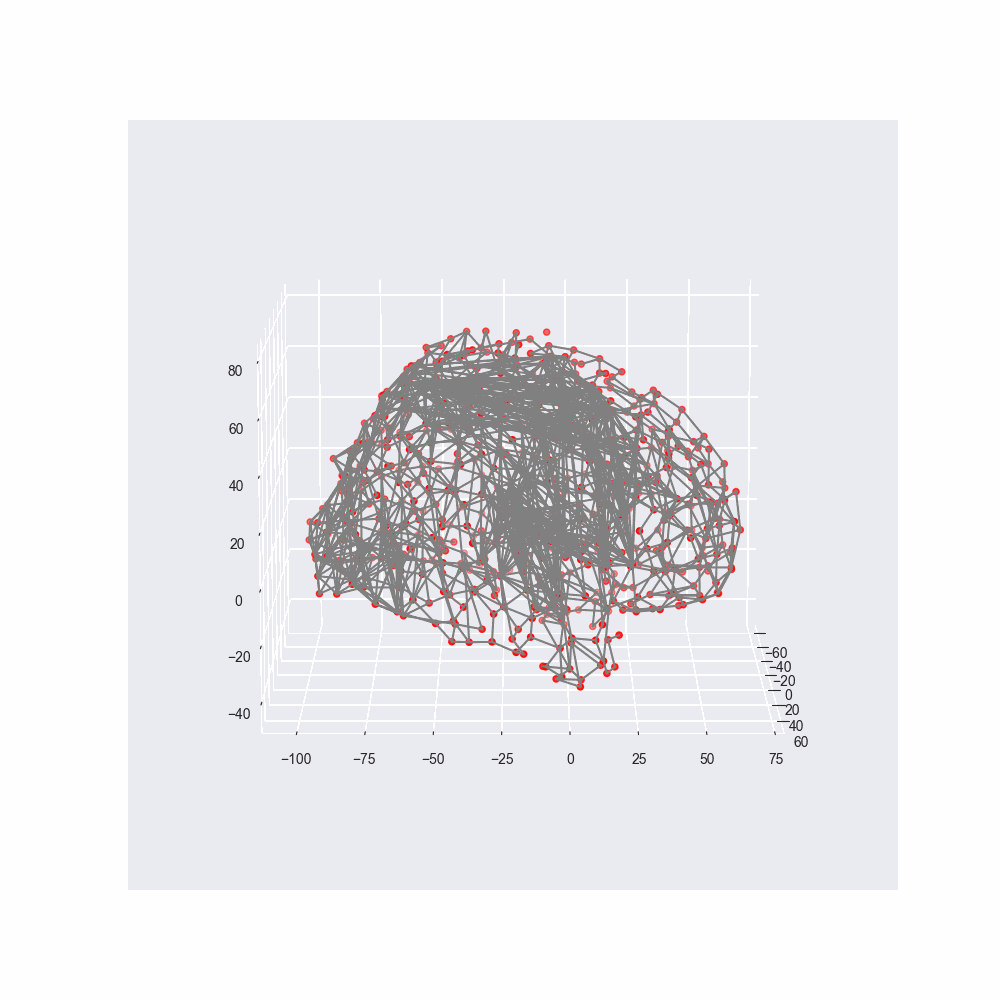

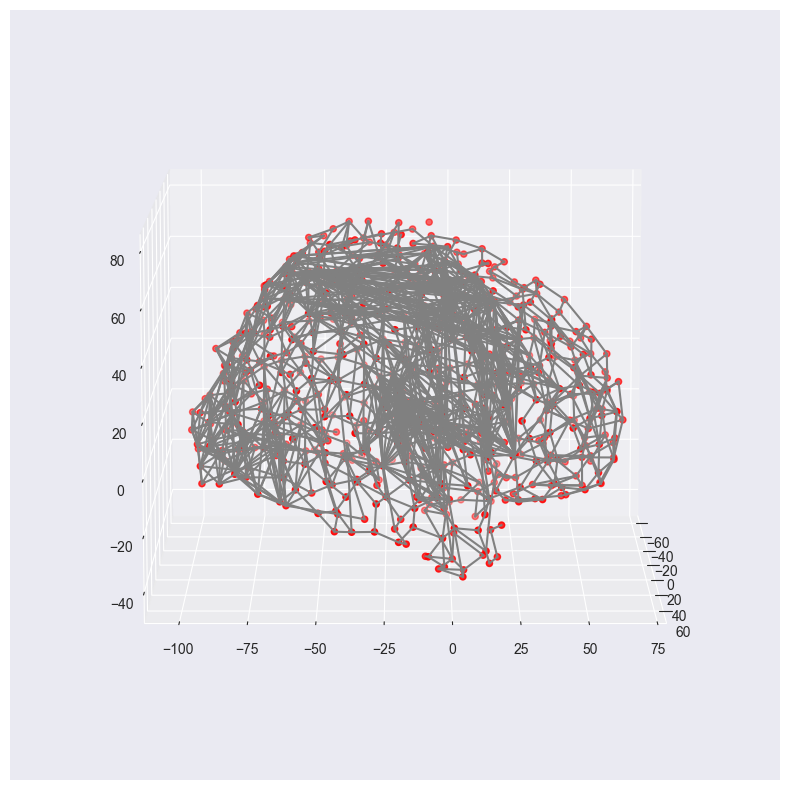

In [241]:

threshold = 0.09
binary_matrix = (coactivation_matrix >= threshold).astype(int)
graph = nx.from_numpy_array(binary_matrix)

pos = {node: coordinates[node] for node in graph.nodes()}

print(f'Grafo con umbral {threshold}, tiene coordenadas de conexiones:\n')
for edge in graph.edges():
    node1, node2 = edge
    x_coords = [pos[node1][0], pos[node2][0]]
    y_coords = [pos[node1][1], pos[node2][1]]
    z_coords = [pos[node1][2], pos[node2][2]]
    print(f'Conexion: x: {x_coords}, y: {y_coords}, z: {z_coords}')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

def draw_graph():
    ax.cla()
    nodes = np.array(list(pos.values()))
    ax.scatter(nodes[:, 0], nodes[:, 1], nodes[:, 2], c='red', s=20)
    for edge in graph.edges():
        start, end = pos[edge[0]], pos[edge[1]]
        ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], c='gray')

def update(num):
    draw_graph()
    ax.view_init(elev=10., azim=num)

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 10), interval=100)

cerebro_mov = "ganim.gif"
ani.save(cerebro_mov, writer=PillowWriter(fps=20))

from IPython.display import Image
Image(cerebro_mov)

## 3
- Encontrar los hubs del grafo, y establecer el tamaño del nodo proporcional al valor
del grado

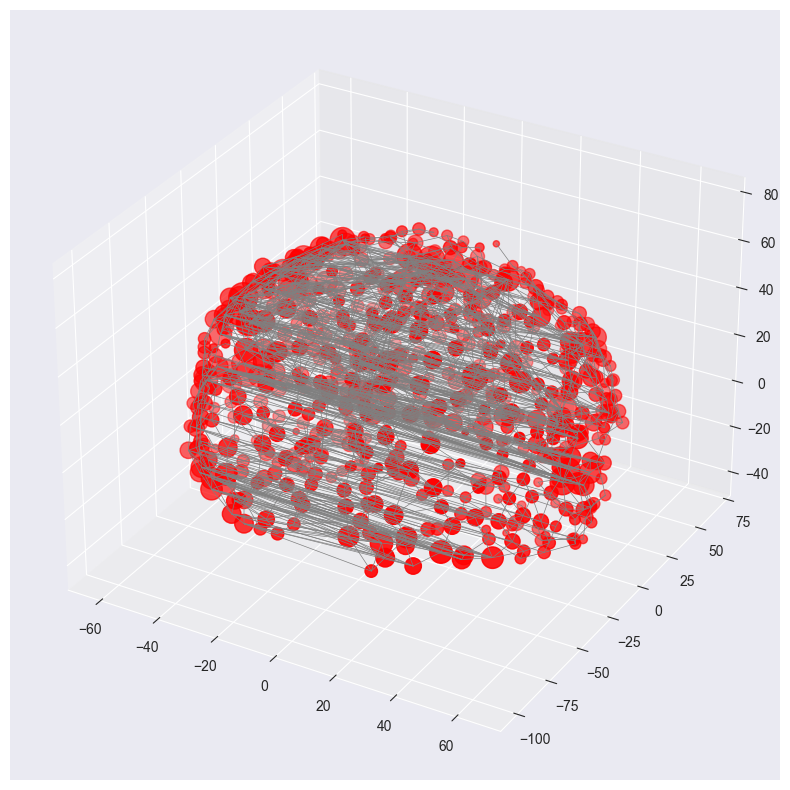

In [242]:

pos = {node: coordinates[node] for node in graph.nodes()}

degree_dict = dict(graph.degree(graph.nodes()))
nx.set_node_attributes(graph, degree_dict, 'degree')
node_size = [degree * 20 for degree in degree_dict.values()]  


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

nodes = np.array(list(pos.values()))
ax.scatter(nodes[:, 0], nodes[:, 1], nodes[:, 2], c='red', s=node_size)  
for edge in graph.edges():
    start, end = pos[edge[0]], pos[edge[1]]
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], c='gray', linewidth=0.5)


plt.show()


In [243]:
# xq los primeros 5?
# hub = grado arriba de media +una desviación estandar
hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]
print("Hubs del grafo (nodos con mayor grado):")
for hub in hubs:
    print(f"Nodo: {hub[0]}, Grado: {hub[1]}")


total_hub_nodes = len(hubs)
total_hub_edges = sum([hub[1] for hub in hubs])
print(f"Total de nodos de los hubs: {total_hub_nodes}")
print(f"Total de conexiones de los hubs: {total_hub_edges}")

Hubs del grafo (nodos con mayor grado):
Nodo: 400, Grado: 24
Nodo: 235, Grado: 23
Nodo: 330, Grado: 22
Nodo: 38, Grado: 21
Nodo: 485, Grado: 21
Total de nodos de los hubs: 5
Total de conexiones de los hubs: 111


## 4
- En función de la matriz de emparejamiento (correlación de la matriz de adyacencia), establecer una partición de los nodos en módulos. Escoger el número de módulos que creas conveniente y justificar por qué escogiste ese número.


Valor mínimo: 0.0
Valor máximo: 0.3355263157894737


/Users/ZvalEnes/Library/Python/3.12/lib/python/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ZvalEnes/Library/Python/3.12/lib/python/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


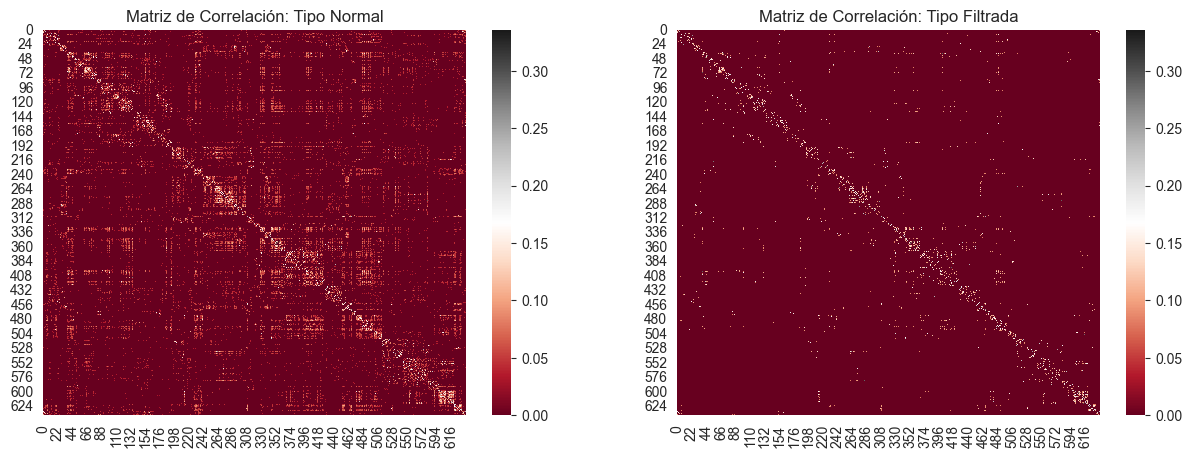

In [244]:
x, y, z = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]

min_value = np.min(coactivation_matrix)
max_value = np.max(coactivation_matrix)
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)


matriz_fil = np.where(coactivation_matrix >= 0.08, coactivation_matrix, 0)
matriz_sfil = np.corrcoef(coactivation_matrix)
matriz_correlacion = np.corrcoef(matriz_fil)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(coactivation_matrix, cmap='RdGy', vmin=min_value, vmax=max_value)
plt.title("Matriz de Correlación: Tipo Normal")

plt.subplot(1, 2, 2)
sns.heatmap(matriz_fil, cmap='RdGy', vmin=min_value, vmax=max_value)
plt.title("Matriz de Correlación: Tipo Filtrada")

plt.show()

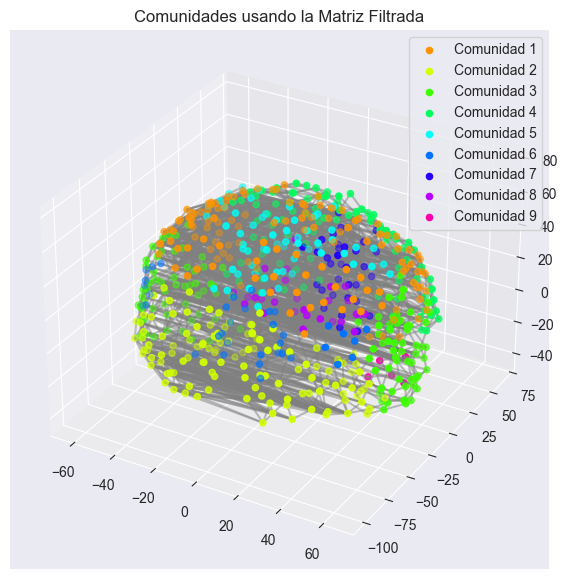

Comunidad 1: [7, 16, 19, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 57, 58, 62, 63, 64, 65, 67, 68, 69, 70, 73, 76, 79, 80, 93, 94, 97, 100, 114, 118, 121, 124, 125, 126, 129, 130, 131, 133, 135, 140, 143, 154, 185, 186, 192, 193, 230, 231, 232, 235, 236, 237, 286, 293, 296, 298, 303, 327, 328, 329, 330, 331, 332, 333, 334, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 364, 365, 368, 369, 370, 371, 372, 375, 397, 398, 399, 400, 401, 403, 404, 405, 406, 407, 408, 410, 412, 416, 418, 421, 423, 430, 436, 440, 444, 450, 481, 482, 485, 486, 487, 488, 489, 490, 491, 494, 495, 496, 497, 509, 511]
Comunidad 2: [513, 258, 257, 259, 260, 516, 261, 517, 264, 521, 263, 265, 262, 266, 267, 270, 268, 272, 271, 275, 276, 277, 273, 278, 25, 26, 274, 28, 27, 30, 280, 29, 33, 34, 31, 32, 284, 290, 36, 289, 291, 292, 35, 551, 300, 301, 557, 302, 304, 305, 54, 311, 312, 313, 570, 314, 310, 315, 316, 575, 317, 318, 576, 580, 523, 269, 335, 336, 337, 340, 341, 3

In [245]:

G = nx.Graph()
for i in range(matriz_fil.shape[0]):
    for j in range(i + 1, matriz_fil.shape[1]):
        if matriz_fil[i, j] > 0:  
            G.add_edge(i, j, weight=matriz_fil[i, j])

# greedy_modularity_communities para detectar comunidades
communities = list(nx.algorithms.community.greedy_modularity_communities(G))


pos = {i: (x[i], y[i], z[i]) for i in range(matriz_fil.shape[0])}
colors = sns.color_palette("hsv", len(communities))  

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, community in enumerate(communities):
    community_nodes = list(community)
    ax.scatter(x[community_nodes], y[community_nodes], z[community_nodes], color=colors[i], label=f'Comunidad {i+1}')

for edge in G.edges():
    x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
    y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
    z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)

ax.set_title("Comunidades usando la Matriz Filtrada")
ax.legend()
plt.show()

for i, community in enumerate(communities):
    print(f'Comunidad {i+1}: {list(community)}')


# Respuesta:
" Escoger el número de módulos que creas conveniente y justificar por qué escogiste ese número."
- Es interesante ver la distribución de los nodos en diferentes comunidades. Elegi el de la Comunidad 1. Esta comunidad es la más grande, con un gran número de nodos. Creo que esto indica que los nodos dentro de esta comunidad están más fuertemente interconectados entre sí que con los nodos fuera de la comunidad.

- Justifico que: Es posible que esta comunidad represente un clúster central o una sub-red muy densa dentro del grafo, donde las conexiones entre los nodos son frecuentes y fuertes.

## 5
- Determinar el conjunto del Rich Club y discutir las implicaciones anatómicas y funcionales de este grupo de nodos (mínimo 100 palabras).


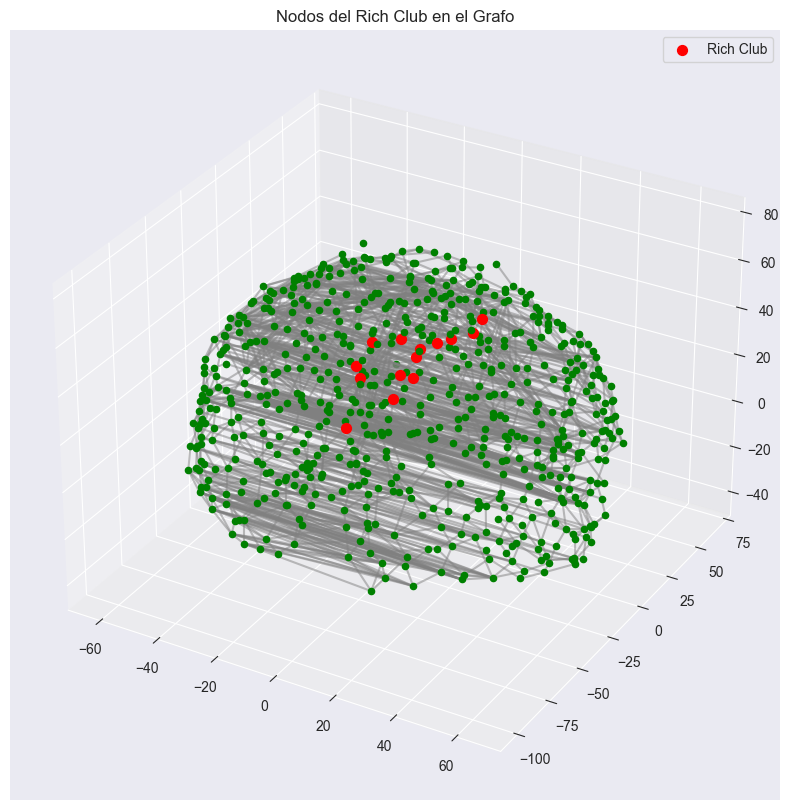

In [246]:
import scipy.io
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


pos = {node: coordinates[node] for node in graph.nodes()}

rich_club_coeff = nx.rich_club_coefficient(graph, normalized=False)
rich_club_nodes = [node for node, coeff in rich_club_coeff.items() if coeff > 0.09] 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for edge in graph.edges():
    x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
    y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
    z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)

for node in graph.nodes():
    if node in rich_club_nodes:
        ax.scatter(pos[node][0], pos[node][1], pos[node][2], color='red', s=50, label='Rich Club' if node == rich_club_nodes[0] else "")
    else:
        ax.scatter(pos[node][0], pos[node][1], pos[node][2], color='green', s=20)

ax.set_title("Nodos del Rich Club en el Grafo")
ax.legend()
plt.show()


# Respuesta
 "Discutir las implicaciones anatómicas y funcionales de este grupo de nodos (mínimo 100 palabras)."
 
- Por lo que puedo observar es que hay una franja de color rojo específicamente en lo que podría ser entre el lóbulo parietal y frontal. Creería que se trata de la corteza somatosensorial. Esta región del cerebro es crucial para procesar información sensorial del cuerpo, como el tacto, la temperatura y la percepción del dolor.
- Se encuentra en el giro postcentral del lóbulo parietal, justo detrás del surco central que separa el lóbulo frontal del parietal.
- Es responsable de recibir y procesar señales sensoriales provenientes de todo el cuerpo. Esto permite que el cerebro interprete y responda adecuadamente a estímulos táctiles.
- Dado su papel en el procesamiento sensorial, tiene implicaciones directas en la coordinación y la integración de movimientos. La información procesada aquí es crucial para ajustar el control motor.
 

## 6
- Supongamos que eliminamos los nodos del RichClub, describir cómo cambian las propiedades topológicas del grafo, hacer comparativas del grado, coeficiente de cluster, coeficiente de mundo pequeño y las medidas de centralidad (cercanía, intermediación)

In [247]:
grados = dict(graph.degree())

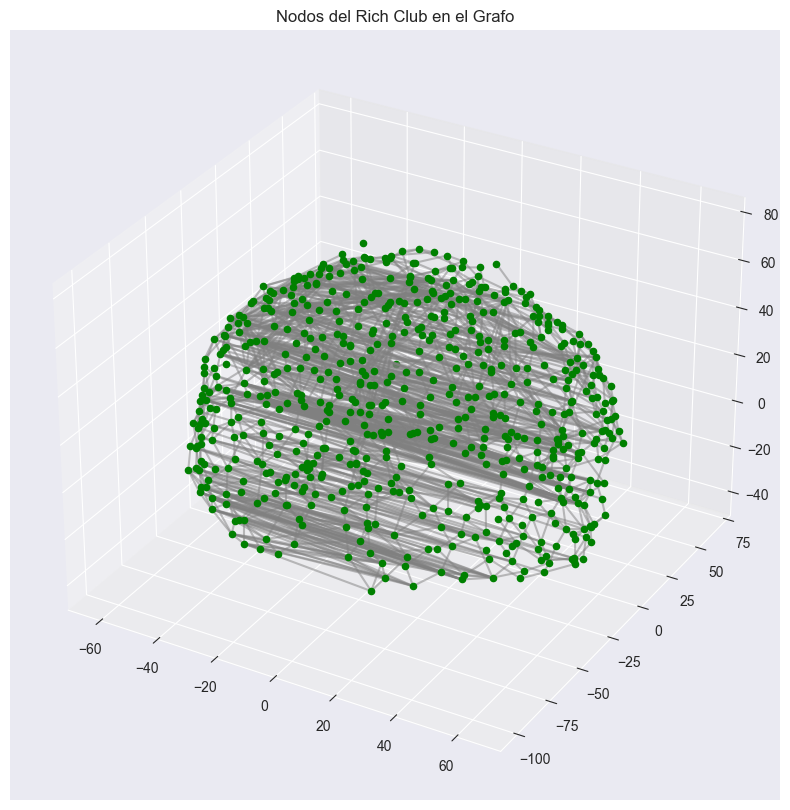

In [248]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

graph_without_rich_club = graph.copy()
graph_without_rich_club.remove_nodes_from(rich_club_nodes)

figura = plt.figure(figsize=(10, 10))
ax = figura.add_subplot(projection='3d')

handles = []
labels = []

for nodo in graph_without_rich_club.nodes():
    valor = grados.get(nodo, 0)
    tamaño = 50 if nodo in rich_club_nodes else 20
    scatter = ax.scatter(pos[nodo][0], pos[nodo][1], pos[nodo][2], color='green', s=tamaño)
    if nodo in rich_club_nodes:
        handles.append(scatter)
        labels.append('Rich Club')

for edge in graph_without_rich_club.edges():
    node1, node2 = edge
    x_coords = [pos[node1][0], pos[node2][0]]
    y_coords = [pos[node1][1], pos[node2][1]]
    z_coords = [pos[node1][2], pos[node2][2]]
    ax.plot(x_coords, y_coords, z_coords, c='gray', alpha=0.5)

ax.set_title("Nodos del Rich Club en el Grafo")
plt.show()



In [249]:

# Función para calcular propiedades topológicas
def calculo_propiedades(G, nombre):
    propiedades = {}
    propiedades["# nodos:"] = G.number_of_nodes()
    propiedades["# aristas:"] = G.number_of_edges()
    propiedades["Grado promedio:"] = sum(dict(G.degree()).values()) / G.number_of_nodes()
    propiedades["Coeficiente de clustering promedio:"] = nx.average_clustering(G)
    propiedades["Centralidad de cercanía:"] = np.mean(list(nx.closeness_centrality(G).values()))
    propiedades["Centralidad de intermediación:"] = np.mean(list(nx.betweenness_centrality(G).values()))
    print(f"Las propiedades que son correspondientes al grafo {nombre}:")
    for key, value in propiedades.items():
        print(f"  {key}: {value}")
    print()
    return propiedades

propiedades_original = calculo_propiedades(graph, 'Tipo Original')


propiedades_sin_rich_club = calculo_propiedades(graph_without_rich_club, 'Tipo Sin Rich Club')



Las propiedades que son correspondientes al grafo Tipo Original:
  # nodos:: 638
  # aristas:: 1791
  Grado promedio:: 5.614420062695925
  Coeficiente de clustering promedio:: 0.2785052819986504
  Centralidad de cercanía:: 0.14410899273204028
  Centralidad de intermediación:: 0.009627134336679834

Las propiedades que son correspondientes al grafo Tipo Sin Rich Club:
  # nodos:: 624
  # aristas:: 1741
  Grado promedio:: 5.580128205128205
  Coeficiente de clustering promedio:: 0.2765827527368351
  Centralidad de cercanía:: 0.14266276052490973
  Centralidad de intermediación:: 0.009896075058291903



# Respuesta:
"Describir cómo cambian las propiedades topológicas del grafo"

- Se ve reducida tanto frontal como occipital la integracion, la eliminación del Rich Club tiene un impacto significativo en las propiedades topológicas del grafo. Reduce el número de nodos y aristas, disminuye el grado promedio, y se anticipa que afecta negativamente al coeficiente de clustering, la centralidad de cercanía y la centralidad de intermediación.
- La comunicación entre las áreas visuales del lóbulo occipital y las funciones ejecutivas del lóbulo frontal se ven disminuidas. Podria ser ya que la C.S procesa y transmite información sobre el tacto, la temperatura y el dolor, lo que es fundamental para una respuesta completa y coordinada a los estímulos.
- La reducción en el número de nodos indica que al eliminar el "Rich Club", se han excluido varios nodos importantes del grafo. Esto sugiere que el Rich Club probablemente estaba compuesto por un número significativo de nodos.


## 7
- Quitar 10%-50% de los nodos con mayor medida de intermediación y describir cómo cambian las propiedades topológicas del grafo, hacer comparativas del grado, coeficiente de cluster, coeficiente de mundo pequeño y las medidas de centralidad (cercanía, intermediación)


Propiedades grafo: Tipo Original:
{'# nodos:': 638, '#aristas:': 1791, 'Grado promedio:': 5.614420062695925, 'Coeficiente de clustering promedio:': 0.2785052819986504, 'Centralidad de cercanía:': np.float64(0.14410899273204028), 'Centralidad de intermediación:': np.float64(0.009627134336679834)}

Propiedades grafo: Tipo Sin Rich Club:
{'# nodos:': 624, '#aristas:': 1741, 'Grado promedio:': 5.580128205128205, 'Coeficiente de clustering promedio:': 0.2765827527368351, 'Centralidad de cercanía:': np.float64(0.14266276052490973), 'Centralidad de intermediación:': np.float64(0.009896075058291903)}

Propiedades tras eliminar 10% de nodos:
{'# nodos:': 562, '#aristas:': 1222, 'Grado promedio:': 4.3487544483985765, 'Coeficiente de clustering promedio:': 0.25758115944948684, 'Centralidad de cercanía:': np.float64(0.10012529310052798), 'Centralidad de intermediación:': np.float64(0.01625823412509617)}

Propiedades tras eliminar 20% de nodos:
{'# nodos:': 500, '#aristas:': 926, 'Grado promedio:':

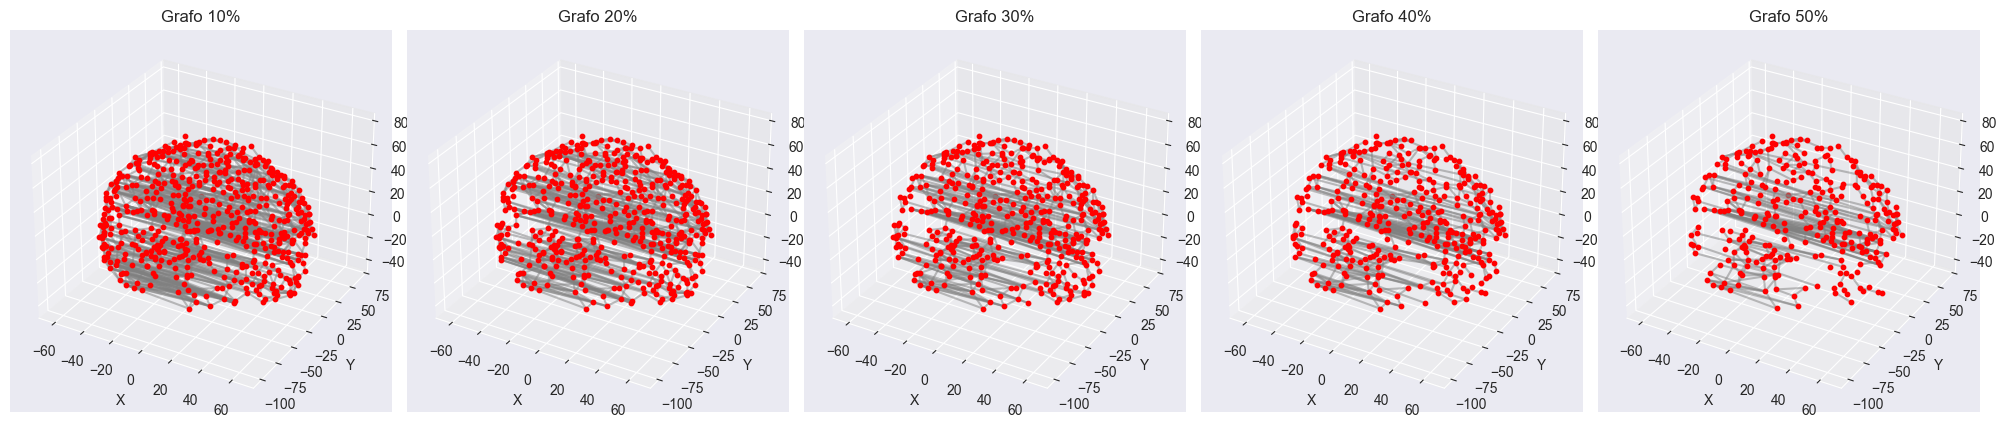

In [250]:

import matplotlib.pyplot as plt


# Función para calcular propiedades topológicas
def propiedades_grafo(G):
    prop= {}
    prop['# nodos:'] = G.number_of_nodes()
    prop['#aristas:'] = G.number_of_edges()
    prop['Grado promedio:'] = sum(dict(G.degree()).values()) / G.number_of_nodes()
    prop['Coeficiente de clustering promedio:'] = nx.average_clustering(G)
    prop['Centralidad de cercanía:'] = np.mean(list(nx.closeness_centrality(G).values()))
    prop['Centralidad de intermediación:'] = np.mean(list(nx.betweenness_centrality(G).values()))
    return prop

def eliminacion_porcentaje(G, porcentaje):
    inter = nx.betweenness_centrality(G)
    nodos_ordenados = sorted(inter, key=inter.get, reverse=True)
    num_nodos_eliminar = int(len(nodos_ordenados) * porcentaje / 100)
    nodos_a_eliminar = nodos_ordenados[:num_nodos_eliminar]
    
    G_modificado = G.copy()
    G_modificado.remove_nodes_from(nodos_a_eliminar)
    return G_modificado

# Función para graficar el grafo en 3D en un subplot
def plot_grafo_3d_subplot(G, x, y, z, ax, titulo):
    for nodo in G.nodes():
        ax.scatter(x[nodo], y[nodo], z[nodo], color='red', s=10)

    for edge in G.edges():
        node1, node2 = edge
        x_coords = [x[node1], x[node2]]
        y_coords = [y[node1], y[node2]]
        z_coords = [z[node1], z[node2]]
        ax.plot(x_coords, y_coords, z_coords, c='gray', alpha=0.5)

    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel('X', fontsize=10)
    ax.set_ylabel('Y', fontsize=10)
    ax.set_zlabel('Z', fontsize=10)

# Calcular y mostrar las propiedades topológicas del grafo original y sin Rich Club
print("Propiedades grafo: Tipo Original:")
propiedades_originales = propiedades_grafo(graph)
print(propiedades_originales)

print("\nPropiedades grafo: Tipo Sin Rich Club:")
propiedades_sin_rich_club = propiedades_grafo(graph_without_rich_club)
print(propiedades_sin_rich_club)

# Eliminar porcentajes de nodos con mayor centralidad de intermediación y graficar los resultados
porcentajes = [10, 20, 30, 40, 50]

fig, axs = plt.subplots(1, 5, figsize=(20, 6), subplot_kw={'projection': '3d'})

for i, porcentaje in enumerate(porcentajes):
    G_modificado = eliminacion_porcentaje(graph_without_rich_club, porcentaje)
    
    print(f"\nPropiedades tras eliminar {porcentaje}% de nodos:")
    propiedades_modificadas = propiedades_grafo(G_modificado)
    print(propiedades_modificadas)

    plot_grafo_3d_subplot(G_modificado, coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], axs[i], f"Grafo {porcentaje}%")

plt.tight_layout()
plt.show()


## 8 
- Generar un modelo nulo aleatorio donde se tenga el mismo número de nodos y el mismo número total de conexiones, y comparar sus propiedades con el grafo original del cerebro.



Adquiriendo las propiedades del grafo original 0.1:
{'grado_promedio': 4.529780564263323, 'coeficiente_de_agrupamiento': 0.24364464673564803, 'centralidad_cercania': np.float64(0.1194031264903796), 'centralidad_intermediacion': np.float64(0.01147712930871217)}

Adquiriendo las ppropiedades del grafo nulo aleatorio  0.1:
{'grado_promedio': 4.529780564263323, 'coeficiente_de_agrupamiento': 0.009199021111246817, 'centralidad_cercania': np.float64(0.22310503211509744), 'centralidad_intermediacion': np.float64(0.005254141093903154)}


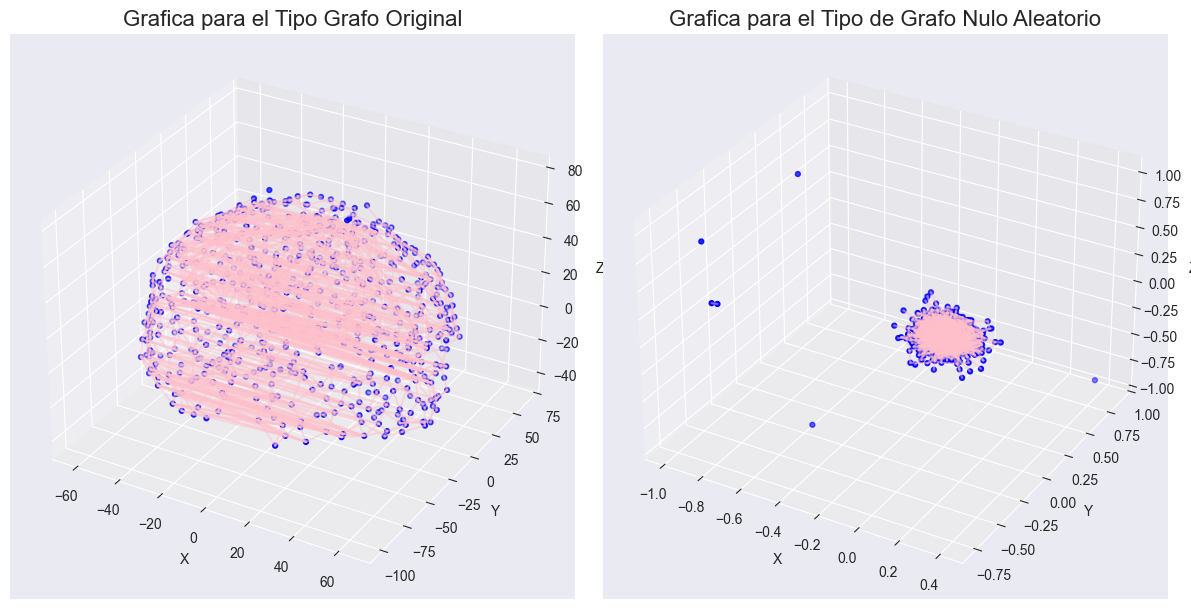

In [257]:
import scipy.io as sp
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

datos = sp.loadmat('/Users/ZvalEnes/Desktop/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/Coactivation_matrix.mat')
matriz_coactivacion = datos['Coactivation_matrix']
coordenadas = datos['Coord']
x, y, z = coordenadas[:, 0], coordenadas[:, 1], coordenadas[:, 2]

umbral_nuevo = 0.1

def propiedades_grafo(grafo):
    propiedades = {}
    
    grado_promedio = sum(dict(grafo.degree()).values()) / grafo.number_of_nodes()
    propiedades['grado_promedio'] = grado_promedio

    coeficiente_agrupamiento = nx.average_clustering(grafo)
    propiedades['coeficiente_de_agrupamiento'] = coeficiente_agrupamiento

    cercania = np.mean(list(nx.closeness_centrality(grafo).values()))
    propiedades['centralidad_cercania'] = cercania

    intermediacion = nx.betweenness_centrality(grafo)
    centralidad_intermediacion = np.mean(list(intermediacion.values()))
    propiedades['centralidad_intermediacion'] = centralidad_intermediacion

    return propiedades

def grafo_nulo_aleatorio(num_nodos, num_aristas):
    grafo_aleatorio = nx.gnm_random_graph(num_nodos, num_aristas)
    return grafo_aleatorio

matriz_filtrada = np.where(matriz_coactivacion >= umbral_nuevo, matriz_coactivacion, 0)
grafo = nx.from_numpy_array(matriz_filtrada)

num_nodos = grafo.number_of_nodes()
num_aristas = grafo.number_of_edges()

grafo_aleatorio = grafo_nulo_aleatorio(num_nodos, num_aristas)

print(f"\nAdquiriendo las propiedades del grafo original {umbral_nuevo}:")
propiedades_original = propiedades_grafo(grafo)
print(propiedades_original)

print(f"\nAdquiriendo las ppropiedades del grafo nulo aleatorio  {umbral_nuevo}:")
propiedades_aleatorio = propiedades_grafo(grafo_aleatorio)
print(propiedades_aleatorio)

figura = plt.figure(figsize=(12, 6))

ax1 = figura.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c='blue', s=50, marker='.')
for edge in grafo.edges():
    nodo1, nodo2 = edge
    coord_x = [x[nodo1], x[nodo2]]
    coord_y = [y[nodo1], y[nodo2]]
    coord_z = [z[nodo1], z[nodo2]]
    ax1.plot(coord_x, coord_y, coord_z, c='pink', alpha=0.5)
ax1.set_title('Grafica para el Tipo Grafo Original', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = figura.add_subplot(122, projection='3d')
pos_aleatorio = nx.spring_layout(grafo_aleatorio, dim=3)
x_a, y_a, z_a = np.array(list(pos_aleatorio.values())).T
ax2.scatter(x_a, y_a, z_a, c='blue', s=50, marker='.')
for edge in grafo_aleatorio.edges():
    nodo1, nodo2 = edge
    coord_x = [x_a[nodo1], x_a[nodo2]]
    coord_y = [y_a[nodo1], y_a[nodo2]]
    coord_z = [z_a[nodo1], z_a[nodo2]]
    ax2.plot(coord_x, coord_y, coord_z, c='pink', alpha=0.5)
ax2.set_title('Grafica para el Tipo de Grafo Nulo Aleatorio', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()




## 9
- Generar un modelo nulo aleatorio donde se conserve la distribución de grado y comparar sus propiedades con el grafo original del cerebro



Propiedades de la red original para el umbral 0.09:
{'grado_promedio': 5.614420062695925, 'coeficiente_de_agrupamiento': 0.2785052819986504, 'centralidad_cercania': np.float64(0.14410899273204028), 'centralidad_intermediacion': np.float64(0.009627134336679834)}

Propiedades de la red nula aleatoria para el umbral 0.09:
{'grado_promedio': 5.551724137931035, 'coeficiente_de_agrupamiento': 0.014521984682824963, 'centralidad_cercania': np.float64(0.26353704152729285), 'centralidad_intermediacion': np.float64(0.004413337692452852)}


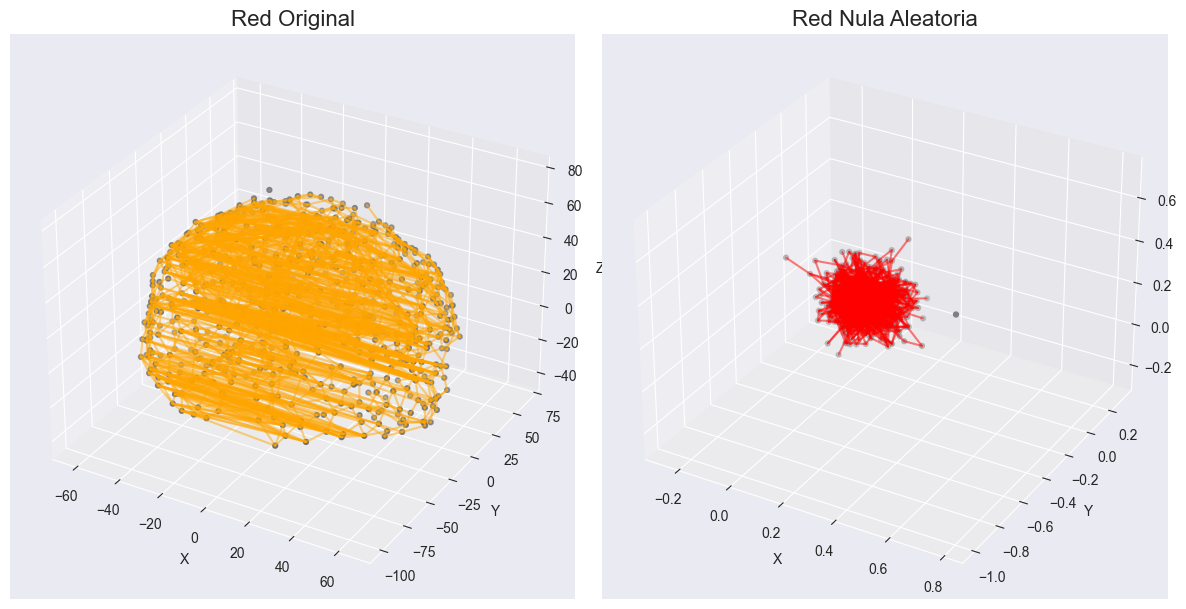

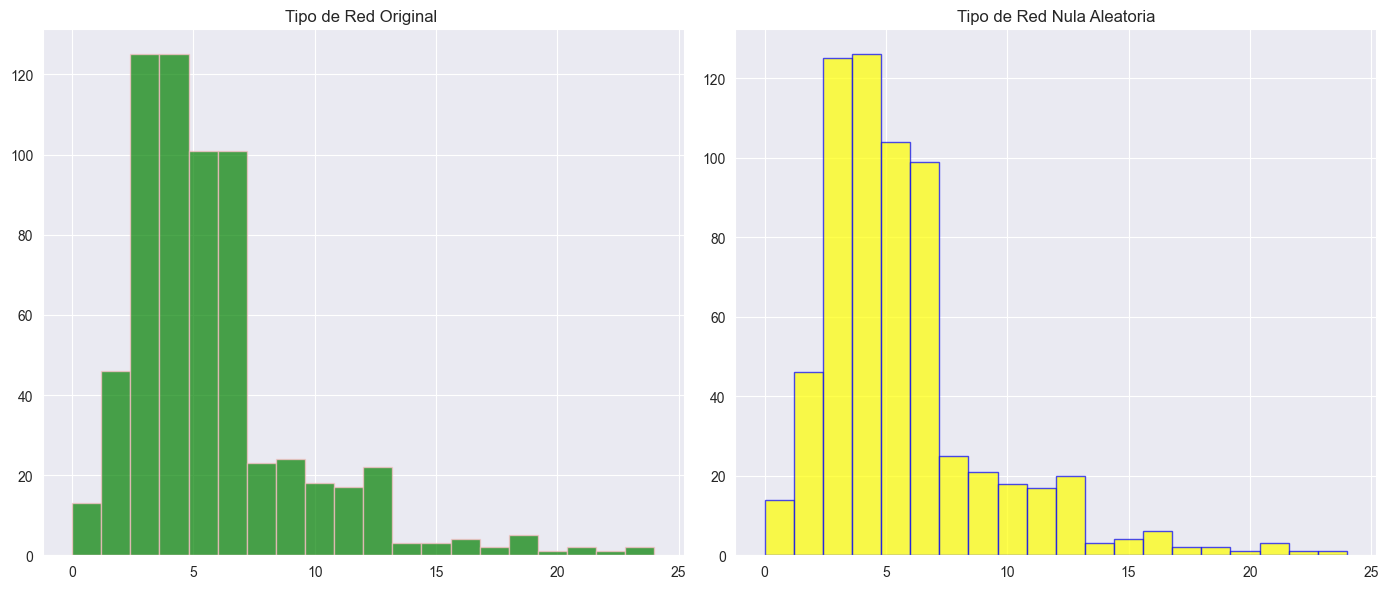

In [252]:

import scipy.io as sp
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

datos = sp.loadmat('/Users/ZvalEnes/Desktop/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/Coactivation_matrix.mat')
matriz_coactivacion = datos['Coactivation_matrix']
coordenadas = datos['Coord']
x, y, z = coordenadas[:, 0], coordenadas[:, 1], coordenadas[:, 2]

umbral_nuevo = 0.09

def propiedades_red(red):
    propiedades = {}
    
    grado_promedio = sum(dict(red.degree()).values()) / red.number_of_nodes()
    propiedades['grado_promedio'] = grado_promedio

    coeficiente_agrupamiento = nx.average_clustering(red)
    propiedades['coeficiente_de_agrupamiento'] = coeficiente_agrupamiento

    cercania = np.mean(list(nx.closeness_centrality(red).values()))
    propiedades['centralidad_cercania'] = cercania

    intermediacion = nx.betweenness_centrality(red)
    centralidad_intermediacion = np.mean(list(intermediacion.values()))
    propiedades['centralidad_intermediacion'] = centralidad_intermediacion

    return propiedades

def red_nula_con_grados(red):
    red_aleatoria = nx.configuration_model([d for n, d in red.degree()])
    red_aleatoria = nx.Graph(red_aleatoria)
    red_aleatoria.remove_edges_from([(u, v) for u, v in red_aleatoria.edges() if u == v])
    return red_aleatoria

matriz_filtrada = np.where(matriz_coactivacion >= umbral_nuevo, matriz_coactivacion, 0)
red = nx.from_numpy_array(matriz_filtrada)

num_nodos = red.number_of_nodes()
num_aristas = red.number_of_edges()

red_aleatoria = red_nula_con_grados(red)
    
print(f"\nPropiedades de la red original para el umbral {umbral_nuevo}:")
propiedades_original = propiedades_red(red)
print(propiedades_original)

print(f"\nPropiedades de la red nula aleatoria para el umbral {umbral_nuevo}:")
propiedades_aleatoria = propiedades_red(red_aleatoria)
print(propiedades_aleatoria)

figura = plt.figure(figsize=(12, 6))

ax1 = figura.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c='dimgray', s=50, marker='.')
for edge in red.edges():
    nodo1, nodo2 = edge
    coord_x = [x[nodo1], x[nodo2]]
    coord_y = [y[nodo1], y[nodo2]]
    coord_z = [z[nodo1], z[nodo2]]
    ax1.plot(coord_x, coord_y, coord_z, c='orange', alpha=0.5)
ax1.set_title('Red Original', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = figura.add_subplot(122, projection='3d')
pos_aleatorio = nx.spring_layout(red_aleatoria, dim=3)
x_a, y_a, z_a = np.array(list(pos_aleatorio.values())).T
ax2.scatter(x_a, y_a, z_a, c='gray', s=50, marker='.')
for edge in red_aleatoria.edges():
    nodo1, nodo2 = edge
    coord_x = [x_a[nodo1], x_a[nodo2]]
    coord_y = [y_a[nodo1], y_a[nodo2]]
    coord_z = [z_a[nodo1], z_a[nodo2]]
    ax2.plot(coord_x, coord_y, coord_z, c='red', alpha=0.5)
ax2.set_title('Red Nula Aleatoria', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
plt.tight_layout()
plt.show()

fig, ejes = plt.subplots(1, 2, figsize=(14, 6))

ax1 = ejes[0]
grados_originales = [d for n, d in red.degree()]
ax1.hist(grados_originales, bins=20, color='green', edgecolor='pink', alpha=0.7)
ax1.set_title("Tipo de Red Original ")

ax2 = ejes[1]
grados_aleatorios = [d for n, d in red_aleatoria.degree()]
ax2.hist(grados_aleatorios, bins=20, color='yellow', edgecolor='blue', alpha=0.7)
ax2.set_title("Tipo de Red Nula Aleatoria")

plt.tight_layout()
plt.show()




## 10
- Generar un modelo nulo utilizando una probabilidad de conexión en función de la distancia geométrica, con el mismo número de nodos y conexiones y compara sus propiedades y discutir la importancia de las conexiones a larga distancia en el cerebro.


Propiedades del grafo original
{'grado_medio': 5.614420062695925, 'coeficiente_de_agrupamiento': 0.2785052819986504, 'centralidad_cercania': np.float64(0.14410899273204028), 'centralidad_intermediacion': np.float64(0.009627134336679834)}

Propiedades del grafo nulo aleatorio basado en distancia
{'grado_medio': 5.614420062695925, 'coeficiente_de_agrupamiento': 0.010128499156712323, 'centralidad_cercania': np.float64(0.25311244429618623), 'centralidad_intermediacion': np.float64(0.00454280515159779)}


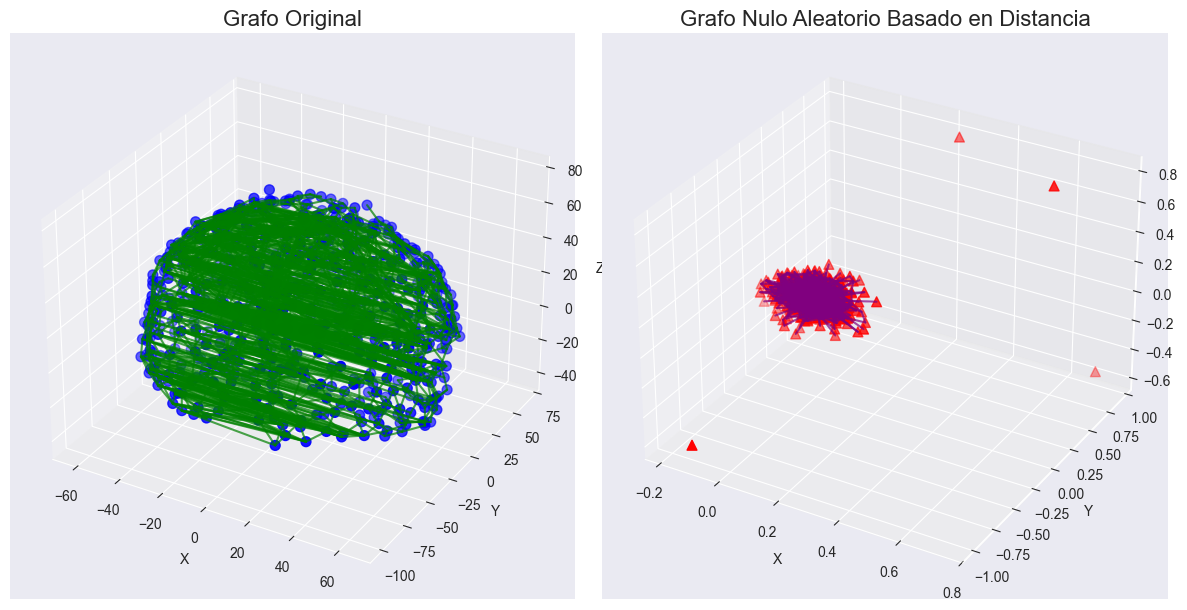

In [253]:
import scipy.io as sp
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


data = sp.loadmat('/Users/ZvalEnes/Desktop/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/Coactivation_matrix.mat')
coactivation_matrix = data['Coactivation_matrix']
coordinates = data['Coord']
x, y, z = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]

umbral = 0.09

def propiedades_grafo(G):
    propiedades = {}
    
    avg_grad = sum(dict(G.degree()).values()) / G.number_of_nodes()
    propiedades['grado_medio'] = avg_grad

    coef_cluster = nx.average_clustering(G)
    propiedades['coeficiente_de_agrupamiento'] = coef_cluster

    cercania = np.mean(list(nx.closeness_centrality(G).values()))
    propiedades['centralidad_cercania'] = cercania

    betweenness = nx.betweenness_centrality(G)
    intermediacion = np.mean(list(betweenness.values()))
    propiedades['centralidad_intermediacion'] = intermediacion

    return propiedades

def distancia_euclidiana(i, j, coord):
    return np.sqrt((coord[i, 0] - coord[j, 0]) ** 2 + (coord[i, 1] - coord[j, 1]) ** 2 + (coord[i, 2] - coord[j, 2]) ** 2)

def grafo_nulo_distancia(coord, num_nodos, num_aristas, alpha=0.1):
    G_random = nx.Graph()

    G_random.add_nodes_from(range(num_nodos))
    
    edges = []
    for i in range(num_nodos):
        for j in range(i + 1, num_nodos):
            dist = distancia_euclidiana(i, j, coord)
            p = 1 / (1 + alpha * dist) 
            if np.random.rand() < p:
                edges.append((i, j))
    
    while len(edges) > num_aristas:
        index = np.random.randint(0, len(edges))
        edges.pop(index)
    
    G_random.add_edges_from(edges)
    return G_random

matriz_filtrada = np.where(coactivation_matrix >= umbral, coactivation_matrix, 0)
G = nx.from_numpy_array(matriz_filtrada)

num_nodos = G.number_of_nodes()
num_aristas = G.number_of_edges()

G_random_dist = grafo_nulo_distancia(coordinates, num_nodos, num_aristas)

print(f"\nPropiedades del grafo original")
propiedades_original = propiedades_grafo(G)
print(propiedades_original)

print(f"\nPropiedades del grafo nulo aleatorio basado en distancia")
propiedades_random_dist = propiedades_grafo(G_random_dist)
print(propiedades_random_dist)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c='blue', s=50, marker='o')
for edge in G.edges():
    node1, node2 = edge
    x_coords = [x[node1], x[node2]]
    y_coords = [y[node1], y[node2]]
    z_coords = [z[node1], z[node2]]
    ax1.plot(x_coords, y_coords, z_coords, c='green', alpha=0.7)
ax1.set_title('Grafo Original', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(122, projection='3d')
pos_random = nx.spring_layout(G_random_dist, dim=3) 
x_r, y_r, z_r = np.array(list(pos_random.values())).T
ax2.scatter(x_r, y_r, z_r, c='red', s=50, marker='^')
for edge in G_random_dist.edges():
    node1, node2 = edge
    x_coords = [x_r[node1], x_r[node2]]
    y_coords = [y_r[node1], y_r[node2]]
    z_coords = [z_r[node1], z_r[node2]]
    ax2.plot(x_coords, y_coords, z_coords, c='purple', alpha=0.7)
ax2.set_title('Grafo Nulo Aleatorio Basado en Distancia', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()



## 11-12
- Escribir una reseña de lo aprendido en el curso, incluyendo la importancia de conocer herramientas de teoría de grafos para comprender la conectividad del cerebro (mínimo 200 palabras).
- **nota identifique que la secuencia de numeros esta mal.


Holaa, profes de programación! 🌟

Primero, quiero agradecerles enormemente por guiarnos en clases con paciencia para entender la conectividad cerebral usando la teoría de grafos y demas herramientas que eran de nuetro desconocimiento.

Me quedo con que a lo largo del curso, comprendi conceptos que leia en papers y no entendia, como redes, los nodos,coeficientes de agrupamiento y medidas de centralidad por mencionar solo algunos. Nunca imaginé que estas herramientas de teoría de grafos fueran tan cruciales para mapear las conexiones de nuestro cerebro.

Aprender a usar Python, MATLAB, GitHub y PyCharm fue gratificante, por que estas herramientas han sido instrumentales para ayudarnos a analizar y visualizar datos y mas que nada redes neuronales. Desde construir grafos cerebrales y el analizar cómo se comunican las diferentes áreas del cerebro. Darme cuenta de lo integral que es la teoría de grafos para entender tanto los estados normales como los patológicos del cerebro. Al representar el cerebro como un grafo, pudimos ver cómo todo está interconectado y de que estas herramientas son importantes para nuestra formacion.

Ahora, me ha surgido un interes por adentrarme en machine learning, aunque estoy empezando, los conceptos básicos que hemos aprendido son muy poderosos para mi futuro como neurocientífica. 

En resumen, esta materia si ha sido motivadora a pesar del horario jaja. El conocimiento que adquiri es verdaderamente invaluable.


In [254]:
####
# Firma:
# Zaira Valentina Avila Lazcano
####